In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
data_periodo_1 = pd.read_csv("info_periodo_1.csv")
data_periodo_2 = pd.read_csv("info_periodo_2.csv")

In [76]:
data_periodo_1.head()

,Cliente,Contrato,Tipo de Crédito,Montante a Recuperar,Período
0,Cliente0001,Contrato3031,Crédito Individual,1109.33,Período 1
1,Cliente0002,Contrato1856,Crédito Habitação,58957.38,Período 1
2,Cliente0002,Contrato2068,Crédito Cartões,6169.21,Período 1
3,Cliente0002,Contrato2581,Crédito Individual,4251.84,Período 1
4,Cliente0003,Contrato2051,Crédito Cartões,13366.11,Período 1


In [77]:
data_periodo_2.head()

,Cliente,Contrato,Tipo de Crédito,Montante a Recuperar,Período
0,Cliente0001,Contrato3253,Crédito Individual,1109.33,Período 2
1,Cliente0002,Contrato1423,Outro Crédito,3166.67,Período 2
2,Cliente0002,Contrato1961,Crédito Habitação,58957.38,Período 2
3,Cliente0002,Contrato2200,Crédito Cartões,6169.21,Período 2
4,Cliente0002,Contrato2695,Crédito Individual,4251.84,Período 2


,Montante a Recuperar
count,3.153000e+03
mean,1.514298e+04
std,9.632901e+04
min,0.000000e+00
25%,1.747000e+02
50%,9.393600e+02
75%,5.616780e+03
max,2.586920e+06


In [38]:
data_periodo_2.describe()

,Montante a Recuperar
count,3.355000e+03
mean,1.490716e+04
std,9.002591e+04
min,0.000000e+00
25%,1.449750e+02
50%,9.054000e+02
75%,5.817550e+03
max,2.324536e+06


In [9]:
resumo_periodo_1 = data_periodo_1.groupby("Tipo de Crédito").agg(
    total_contratos=("Contrato", "nunique"),
    montante_total=("Montante a Recuperar", "sum")
).reset_index()

In [10]:
resumo_periodo_2 = data_periodo_2.groupby("Tipo de Crédito").agg(
    total_contratos=("Contrato", "nunique"),
    montante_total=("Montante a Recuperar", "sum")
).reset_index()

In [11]:
resumo_periodo_1['Período'] = 'Período 1'
resumo_periodo_2['Período'] = 'Período 2'

In [12]:
resumo_comparado = pd.concat([resumo_periodo_1, resumo_periodo_2])

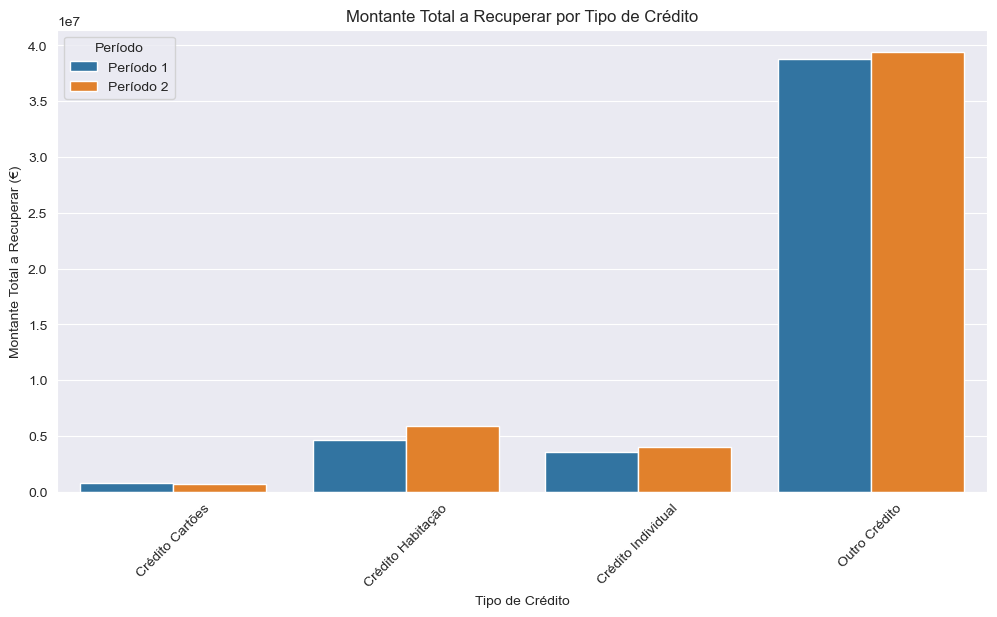

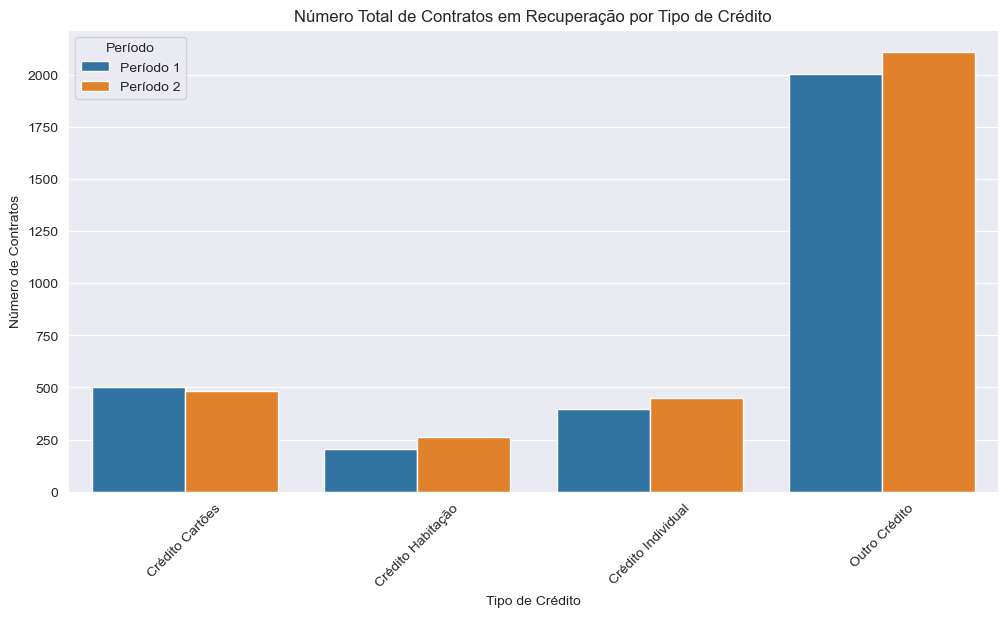

In [13]:
# Visualização Gráfica da Comparação entre Períodos
plt.figure(figsize=(12, 6))
sns.barplot(
    data=resumo_comparado, x="Tipo de Crédito", y="montante_total", hue="Período"
)
plt.title("Montante Total a Recuperar por Tipo de Crédito")
plt.xlabel("Tipo de Crédito")
plt.ylabel("Montante Total a Recuperar (€)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=resumo_comparado, x="Tipo de Crédito", y="total_contratos", hue="Período"
)
plt.title("Número Total de Contratos em Recuperação por Tipo de Crédito")
plt.xlabel("Tipo de Crédito")
plt.ylabel("Número de Contratos")
plt.xticks(rotation=45)
plt.show()

In [14]:
# Comparação em Tabela
# Merge para facilitar a comparação lado a lado
comparacao_tabela = resumo_periodo_1.merge(
    resumo_periodo_2, on="Tipo de Crédito", suffixes=('_Periodo_1', '_Periodo_2')
)
comparacao_tabela["Variação Montante (%)"] = (
    (comparacao_tabela["montante_total_Periodo_2"] - comparacao_tabela["montante_total_Periodo_1"])
    / comparacao_tabela["montante_total_Periodo_1"] * 100
)
comparacao_tabela["Variação Contratos (%)"] = (
    (comparacao_tabela["total_contratos_Periodo_2"] - comparacao_tabela["total_contratos_Periodo_1"])
    / comparacao_tabela["total_contratos_Periodo_1"] * 100
)

# Exibir a tabela de comparação
comparacao_tabela

,Tipo de Crédito,total_contratos_Periodo_1,montante_total_Periodo_1,Período_Periodo_1,total_contratos_Periodo_2,montante_total_Periodo_2,Período_Periodo_2,Variação Montante (%),Variação Contratos (%)
0,Crédito Cartões,504,775102.86,Período 1,483,708111.69,Período 2,-8.642875,-4.166667
1,Crédito Habitação,205,4646982.16,Período 1,261,5889828.34,Período 2,26.745232,27.317073
2,Crédito Individual,395,3526576.23,Período 1,450,3982074.39,Período 2,12.916158,13.924051
3,Outro Crédito,2005,38797168.58,Período 1,2111,39433514.59,Período 2,1.640187,5.286783


In [15]:
# Resumo por Cliente para cada período
resumo_cliente_periodo_1 = data_periodo_1.groupby("Cliente").agg(
    total_contratos=("Contrato", "nunique"),
    montante_total=("Montante a Recuperar", "sum")
).reset_index()

resumo_cliente_periodo_2 = data_periodo_2.groupby("Cliente").agg(
    total_contratos=("Contrato", "nunique"),
    montante_total=("Montante a Recuperar", "sum")
).reset_index()

In [16]:
# Comparação entre períodos
comparacao_cliente = resumo_cliente_periodo_1.merge(
    resumo_cliente_periodo_2, on="Cliente", suffixes=('_Periodo_1', '_Periodo_2'), how="outer"
).fillna(0)  # Preenche valores ausentes com zero para clientes presentes em apenas um período


In [17]:
# Calcular variações no montante e no número de contratos
comparacao_cliente["Variação Montante (€)"] = (
    comparacao_cliente["montante_total_Periodo_2"] - comparacao_cliente["montante_total_Periodo_1"]
)
comparacao_cliente["Variação Contratos"] = (
    comparacao_cliente["total_contratos_Periodo_2"] - comparacao_cliente["total_contratos_Periodo_1"]
)

In [18]:
comparacao_cliente.head()

,Cliente,total_contratos_Periodo_1,montante_total_Periodo_1,total_contratos_Periodo_2,montante_total_Periodo_2,Variação Montante (€),Variação Contratos
0,Cliente0001,1.0,1109.33,1,1109.33,0.00,0.0
1,Cliente0002,3.0,69378.43,4,72545.10,3166.67,1.0
2,Cliente0003,1.0,13366.11,1,13366.11,0.00,0.0
3,Cliente0004,1.0,11271.04,1,12471.62,1200.58,0.0
4,Cliente0005,1.0,341.22,1,4640.72,4299.50,0.0


In [19]:
# Identificar os clientes com maior aumento e redução no montante a recuperar
top_aumentos = comparacao_cliente.nlargest(10, "Variação Montante (€)")
top_reducoes = comparacao_cliente.nsmallest(10, "Variação Montante (€)")


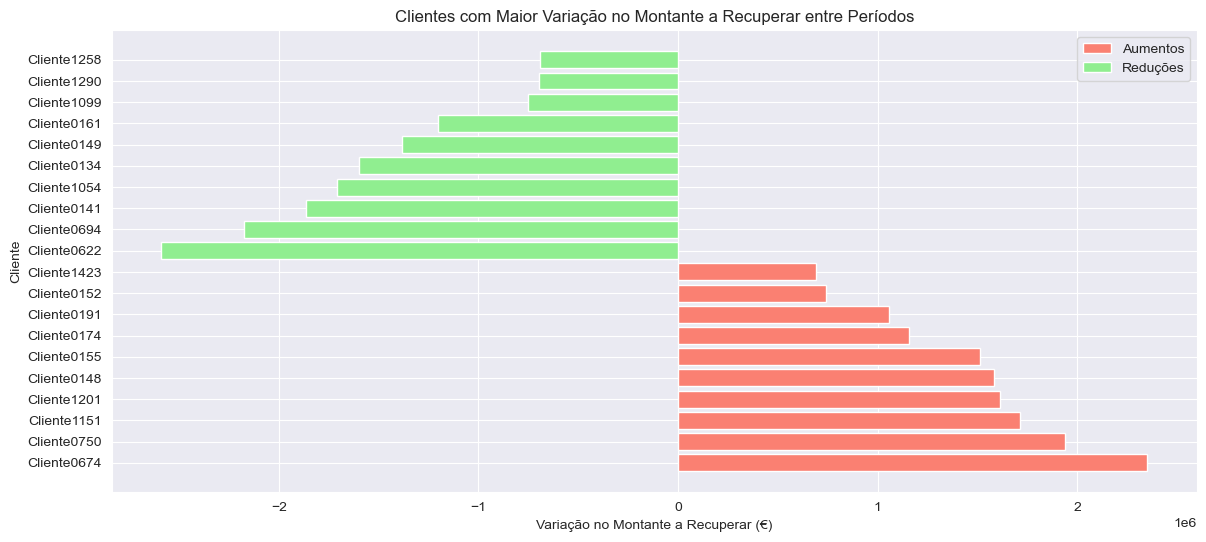

In [20]:
# Visualizar clientes com maior variação positiva e negativa
plt.figure(figsize=(14, 6))
plt.barh(top_aumentos["Cliente"], top_aumentos["Variação Montante (€)"], color="salmon", label="Aumentos")
plt.barh(top_reducoes["Cliente"], top_reducoes["Variação Montante (€)"], color="lightgreen", label="Reduções")
plt.xlabel("Variação no Montante a Recuperar (€)")
plt.ylabel("Cliente")
plt.title("Clientes com Maior Variação no Montante a Recuperar entre Períodos")
plt.legend()
plt.show()

In [21]:
# Resumo por Tipo de Crédito para ambos os períodos
resumo_periodo_1 = data_periodo_1.groupby("Tipo de Crédito").agg(
    total_contratos=("Contrato", "nunique"),
    montante_total=("Montante a Recuperar", "sum")
).reset_index()

resumo_periodo_2 = data_periodo_2.groupby("Tipo de Crédito").agg(
    total_contratos=("Contrato", "nunique"),
    montante_total=("Montante a Recuperar", "sum")
).reset_index()

In [22]:
# Cálculo do valor médio por contrato
resumo_periodo_1["valor_medio_contrato"] = resumo_periodo_1["montante_total"] / resumo_periodo_1["total_contratos"]
resumo_periodo_2["valor_medio_contrato"] = resumo_periodo_2["montante_total"] / resumo_periodo_2["total_contratos"]


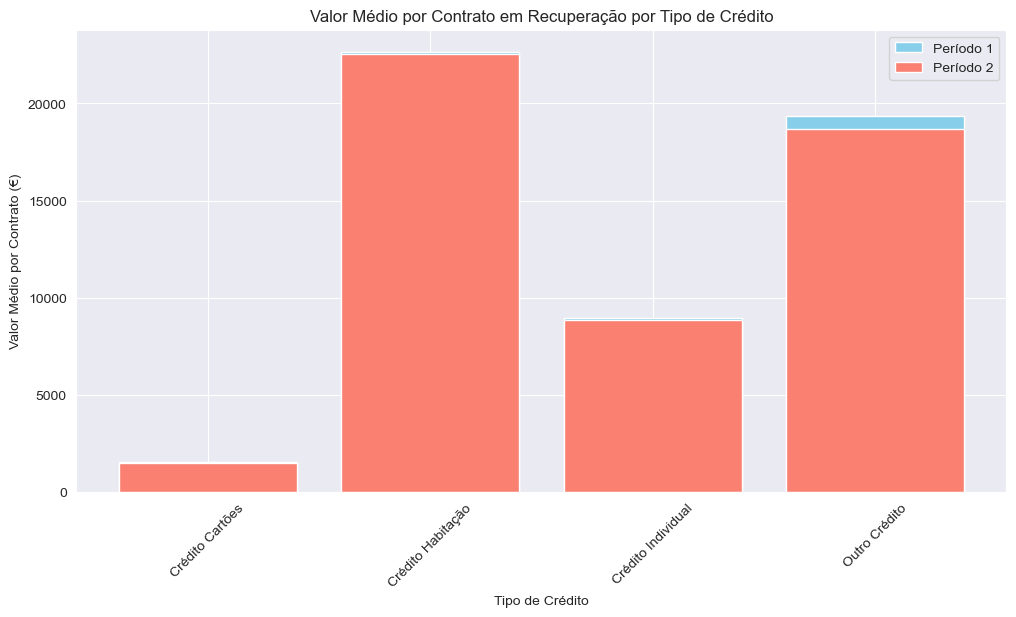

In [23]:
# Gráficos do valor médio por contrato para cada período
plt.figure(figsize=(12, 6))
plt.bar(resumo_periodo_1["Tipo de Crédito"], resumo_periodo_1["valor_medio_contrato"], color="skyblue", label="Período 1")
plt.bar(resumo_periodo_2["Tipo de Crédito"], resumo_periodo_2["valor_medio_contrato"], color="salmon", label="Período 2")
plt.title("Valor Médio por Contrato em Recuperação por Tipo de Crédito")
plt.xlabel("Tipo de Crédito")
plt.ylabel("Valor Médio por Contrato (€)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [24]:
# Agrupar por cliente e somar o montante a recuperar em cada período
resumo_cliente_periodo_1 = data_periodo_1.groupby("Cliente").agg(
    montante_total_periodo_1=("Montante a Recuperar", "sum")
).reset_index()

resumo_cliente_periodo_2 = data_periodo_2.groupby("Cliente").agg(
    montante_total_periodo_2=("Montante a Recuperar", "sum")
).reset_index()

In [25]:
# Juntar os dados dos dois períodos com base no Cliente
comparacao_clientes = resumo_cliente_periodo_1.merge(
    resumo_cliente_periodo_2, on="Cliente", how="outer"
).fillna(0)  # Preenche valores ausentes com zero para clientes presentes em apenas um período

In [26]:
# Calcular a variação absoluta e percentual no montante a recuperar
comparacao_clientes["Variação Absoluta (€)"] = (
    comparacao_clientes["montante_total_periodo_2"] - comparacao_clientes["montante_total_periodo_1"]
)
comparacao_clientes["Variação Percentual (%)"] = (
    comparacao_clientes["Variação Absoluta (€)"] / comparacao_clientes["montante_total_periodo_1"].replace(0, 1) * 100
)

In [27]:
# Selecionar os 10 clientes com maior aumento e maior redução no montante a recuperar
top_aumentos = comparacao_clientes.nlargest(10, "Variação Absoluta (€)")
top_reducoes = comparacao_clientes.nsmallest(10, "Variação Absoluta (€)")

In [28]:
# Exibir a tabela consolidada com as maiores variações (maior aumento e maior redução)
tabela_variacoes = pd.concat([top_aumentos, top_reducoes]).reset_index(drop=True)
tabela_variacoes = tabela_variacoes[[
    "Cliente", "montante_total_periodo_1", "montante_total_periodo_2", 
    "Variação Absoluta (€)", "Variação Percentual (%)"
]]
tabela_variacoes.columns = ["Cliente", "Montante Período 1 (€)", "Montante Período 2 (€)", 
                            "Variação Absoluta (€)", "Variação Percentual (%)"]

# Exibir a tabela final
tabela_variacoes

,Cliente,Montante Período 1 (€),Montante Período 2 (€),Variação Absoluta (€),Variação Percentual (%)
0,Cliente0674,15861.77,2366284.31,2350422.54,1.481816e+04
1,Cliente0750,21376.73,1958698.61,1937321.88,9.062761e+03
2,Cliente1151,786.40,1713041.97,1712255.57,2.177334e+05
3,Cliente1201,70.22,1610627.85,1610557.63,2.293588e+06
4,Cliente0148,14814.02,1597888.13,1583074.11,1.068632e+04
5,Cliente0155,353444.38,1863858.01,1510413.63,4.273412e+02
6,Cliente0174,28052.43,1182089.81,1154037.38,4.113859e+03
7,Cliente0191,32494.44,1090091.41,1057596.97,3.254701e+03
8,Cliente0152,4278.05,742596.23,738318.18,1.725829e+04
9,Cliente1423,65.18,689353.39,689288.21,1.057515e+06


In [30]:
# Calcular % dos tipos de contrato no Período 1
percentuais_periodo_1 = data_periodo_1['Tipo de Crédito'].value_counts(normalize=True) * 100

# Calcular % dos tipos de contrato no Período 2
percentuais_periodo_2 = data_periodo_2['Tipo de Crédito'].value_counts(normalize=True) * 100

# Combinar os resultados em um DataFrame
percentuais_df = pd.DataFrame({
    'Período 1': percentuais_periodo_1,
    'Período 2': percentuais_periodo_2
}).fillna(0)  # Preencher valores NaN com 0
percentuais_df = percentuais_df.reset_index().rename(columns={'index': 'Tipo de Crédito'})


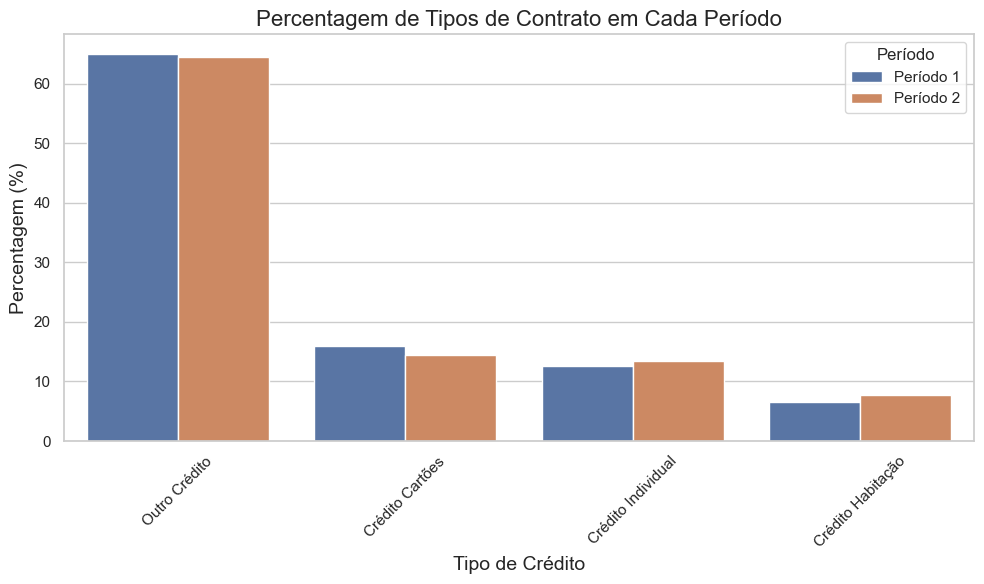

In [47]:
# Definir o estilo do gráfico
sns.set(style="whitegrid")

# Derreter o DataFrame para facilitar a plotagem com seaborn
percentuais_melted = percentuais_df.melt(id_vars='Tipo de Crédito', 
                                           var_name='Período', 
                                           value_name='Percentagem')

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Tipo de Crédito', y='Percentagem', hue='Período', data=percentuais_melted)

# Definir título e rótulos do gráfico
plt.title('Percentagem de Tipos de Contrato em Cada Período', fontsize=16)
plt.xlabel('Tipo de Crédito', fontsize=14)
plt.ylabel('Percentagem (%)', fontsize=14)
plt.xticks(rotation=45)  # Rotacionar rótulos do eixo x para melhor legibilidade
plt.legend(title='Período')
plt.tight_layout()  # Ajustar layout para evitar cortes

# Exibir o gráfico
plt.show()

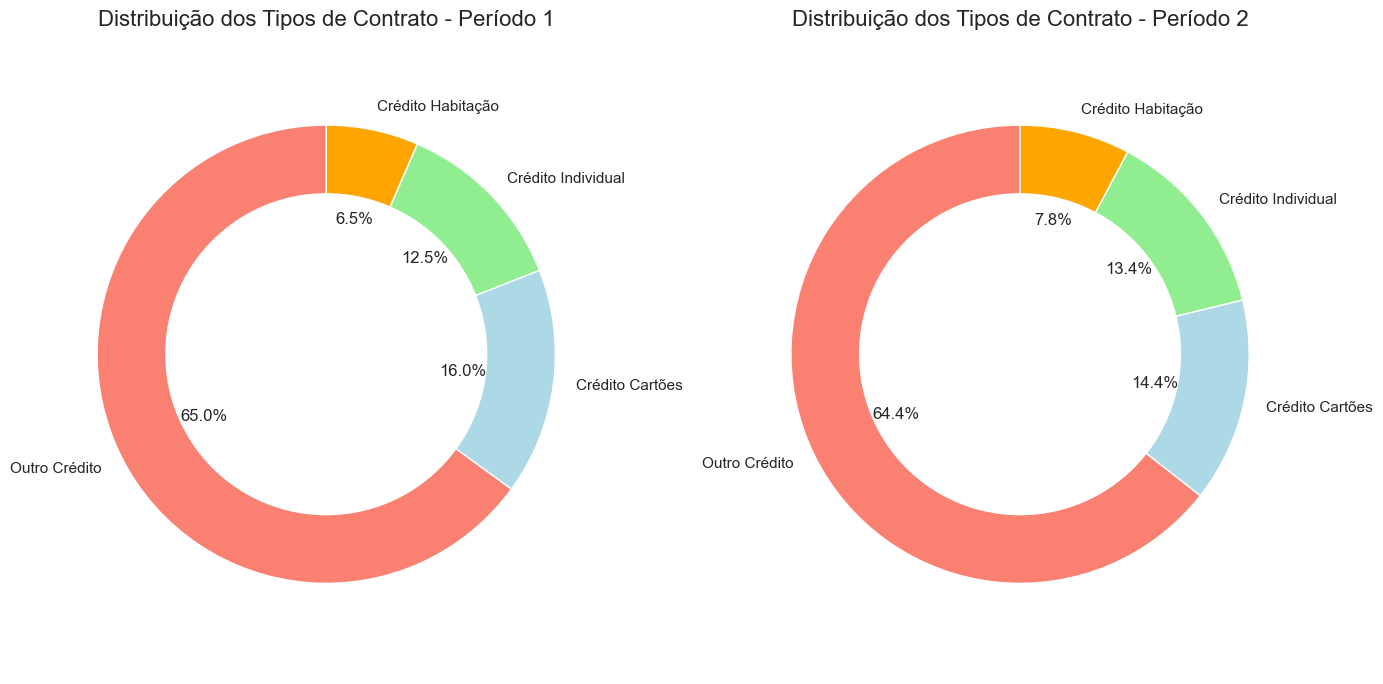

In [56]:
import matplotlib.pyplot as plt

# Definir cores específicas para cada tipo de contrato
cores = ['salmon', 'lightblue', 'lightgreen', 'orange']  # Cores correspondentes aos tipos de contrato na ordem desejada

# Criar a figura com 2 subgráficos (um para cada período)
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Gráfico de Donut para o Período 1
axes[0].pie(
    percentuais_periodo_1, 
    labels=percentuais_periodo_1.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=cores  # Aplicando as cores definidas
)
centre_circle_1 = plt.Circle((0, 0), 0.70, fc='white')  # Círculo central
axes[0].add_artist(centre_circle_1)
axes[0].axis('equal')  # Igualar proporções
axes[0].set_title('Distribuição dos Tipos de Contrato - Período 1', fontsize=16)

# Gráfico de Donut para o Período 2
axes[1].pie(
    percentuais_periodo_2, 
    labels=percentuais_periodo_2.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=cores  # Aplicando as mesmas cores definidas
)
centre_circle_2 = plt.Circle((0, 0), 0.70, fc='white')  # Círculo central
axes[1].add_artist(centre_circle_2)
axes[1].axis('equal')  # Igualar proporções
axes[1].set_title('Distribuição dos Tipos de Contrato - Período 2', fontsize=16)

# Ajustar o layout
plt.tight_layout()
plt.show()



In [39]:
# Adicionar a coluna de período
data_periodo_1['Período'] = 'Período 1'
data_periodo_2['Período'] = 'Período 2'

# Combinar os DataFrames
data_combinada = pd.concat([data_periodo_1, data_periodo_2])

In [40]:
# Calcular o valor médio por contrato para cada tipo de crédito em cada período
media_por_contrato = data_combinada.groupby(['Período', 'Tipo de Crédito'])['Montante a Recuperar'].mean().reset_index()

In [49]:
media_por_contrato

,Período,Tipo de Crédito,Montante a Recuperar
0,Período 1,Crédito Cartões,1537.902500
1,Período 1,Crédito Habitação,22668.205659
2,Período 1,Crédito Individual,8928.041089
3,Período 1,Outro Crédito,18934.684519
4,Período 2,Crédito Cartões,1466.069752
5,Período 2,Crédito Habitação,22566.392107
6,Período 2,Crédito Individual,8849.054200
7,Período 2,Outro Crédito,18247.808695


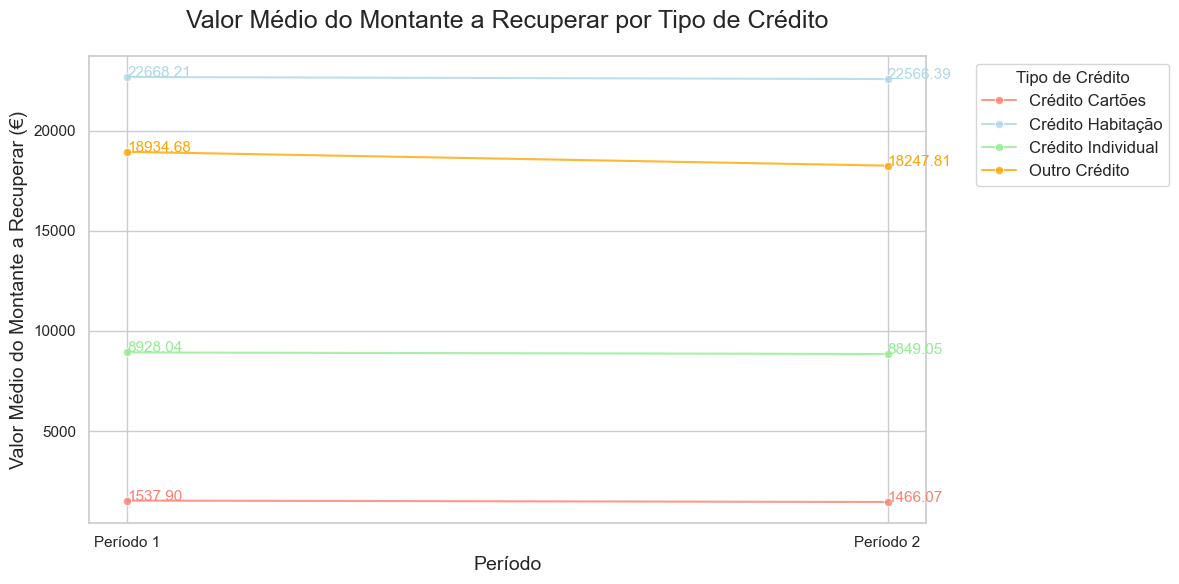

In [96]:
# Define a paleta de cores
palette = ['salmon', 'lightblue', 'lightgreen', 'orange']

# Definir o estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(
    x='Período', 
    y='Montante a Recuperar', 
    hue='Tipo de Crédito', 
    data=media_por_contrato, 
    marker='o', 
    markersize=6,  # Tamanho menor dos marcadores
    alpha=0.8,  # Leve transparência
    palette=palette
)

# Adicionar rótulos de dados para cada ponto
for line in lineplot.get_lines():
    for x_point, y_point in zip(line.get_xdata(), line.get_ydata()):
        lineplot.text(x_point, y_point, f'{y_point:.2f}', ha='left', fontsize=11,  color=line.get_color())

# Definir título e rótulos
plt.title('Valor Médio do Montante a Recuperar por Tipo de Crédito', fontsize=18, pad=20)
plt.xlabel('Período', fontsize=14)
plt.ylabel('Valor Médio do Montante a Recuperar (€)', fontsize=14)

# Posicionar a legenda fora do gráfico para clareza
plt.legend(title='Tipo de Crédito', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()


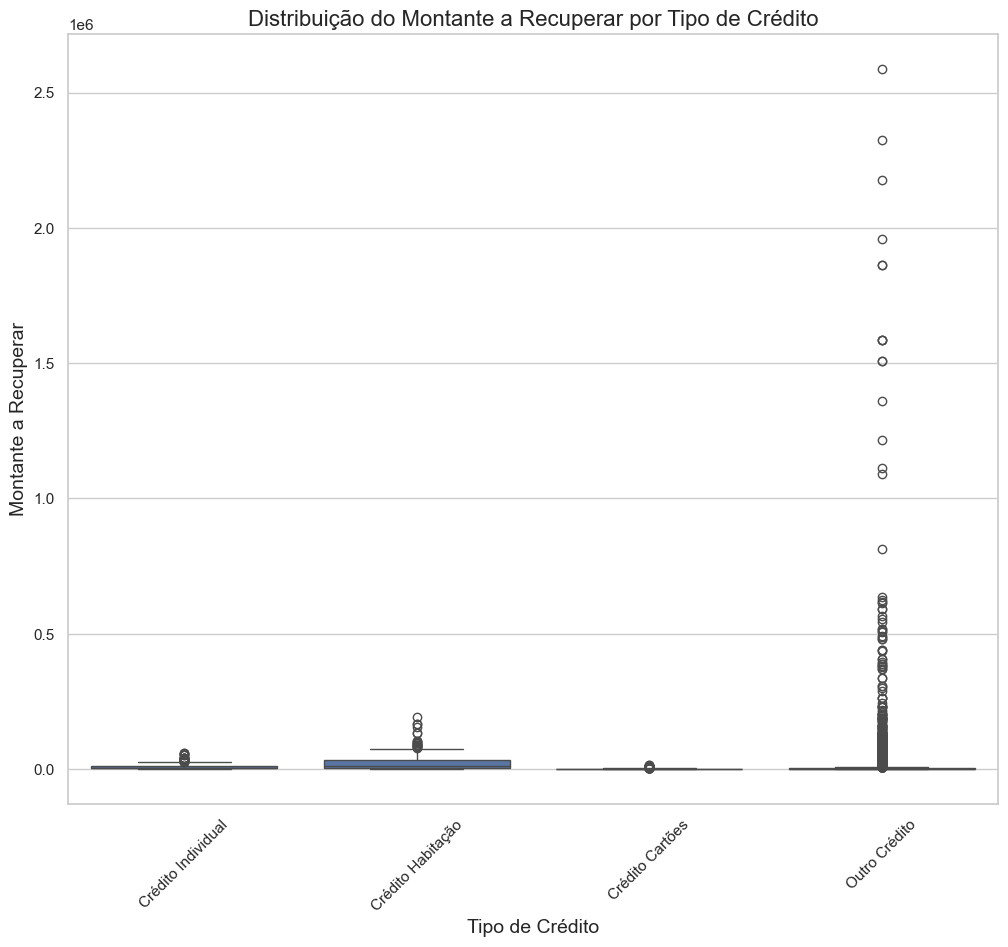

In [45]:
# Definir o estilo do gráfico
sns.set(style="whitegrid")

# Criar o boxplot
plt.figure(figsize=(12, 10))
sns.boxplot(x='Tipo de Crédito', y='Montante a Recuperar', data=data_combinada)

# Definir título e rótulos dos eixos
plt.title('Distribuição do Montante a Recuperar por Tipo de Crédito', fontsize=16)
plt.xlabel('Tipo de Crédito', fontsize=14)
plt.ylabel('Montante a Recuperar', fontsize=14)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Exibir o gráfico
plt.show()


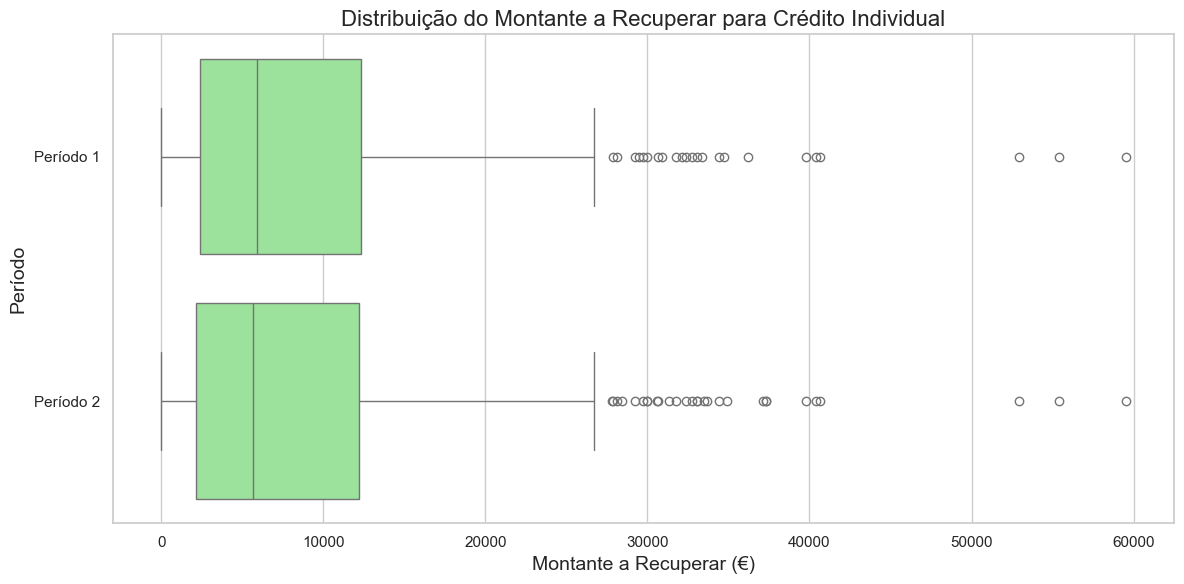

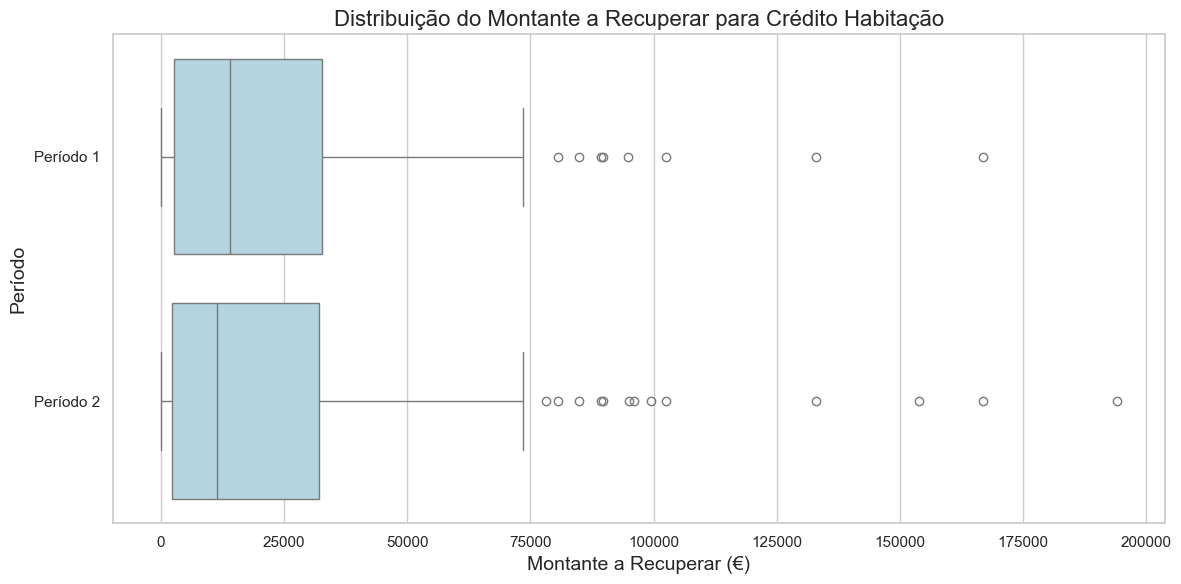

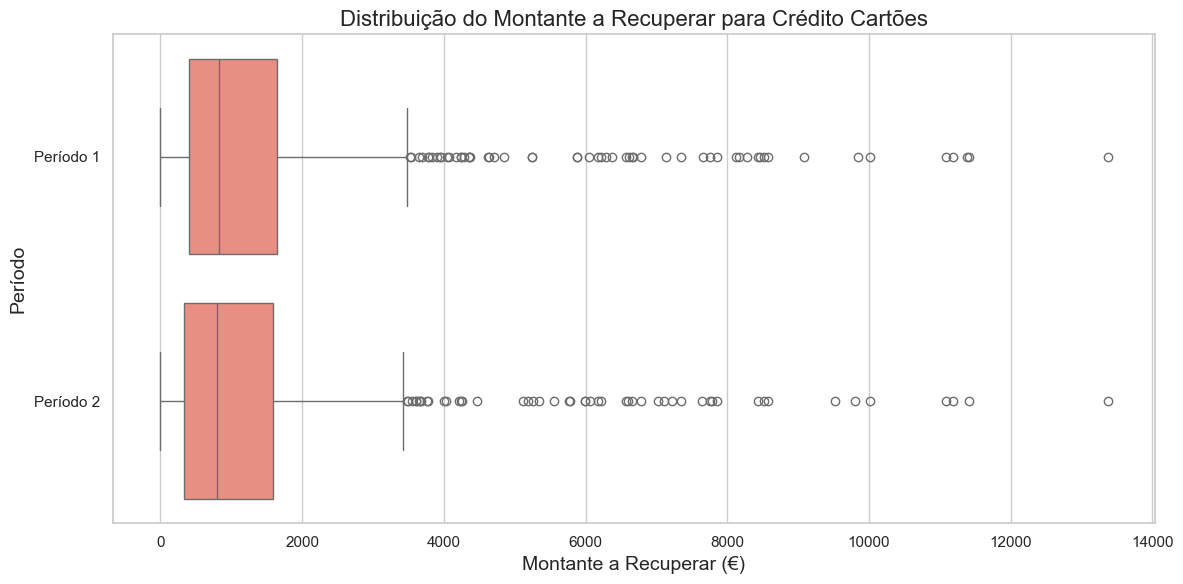

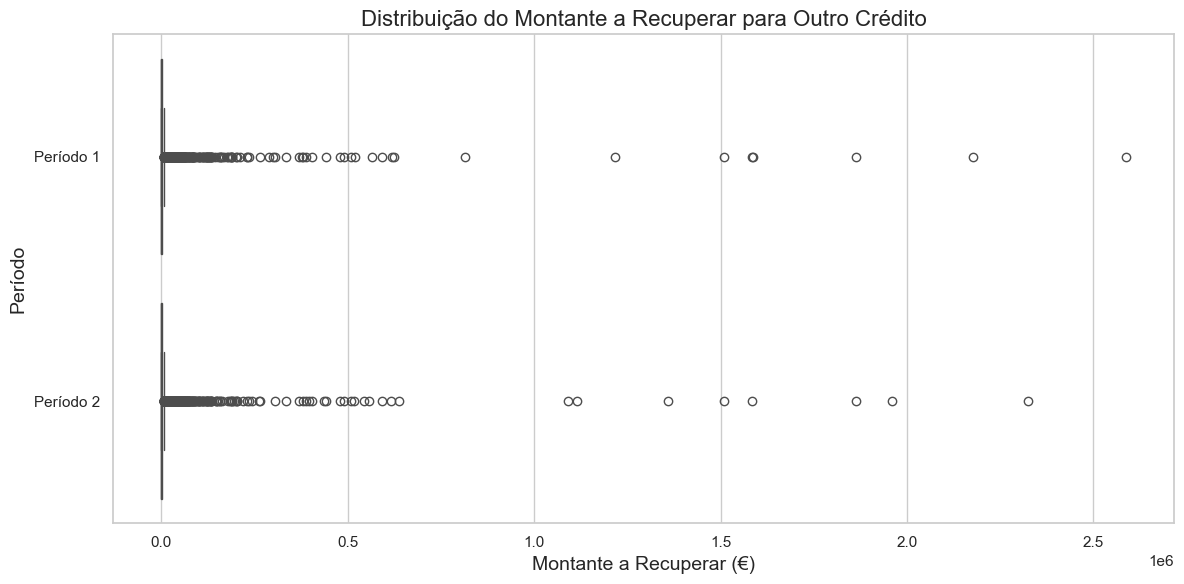

In [100]:
# Obter a lista de tipos de crédito únicos
tipos_credito = data_combinada['Tipo de Crédito'].unique()

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Definir a paleta de cores
palette = {
    'Crédito Cartões': 'salmon',
    'Crédito Habitação': 'lightblue',
    'Crédito Individual': 'lightgreen',
    'Outro Crédito': 'orange'
}

# Criar um boxplot horizontal para cada tipo de crédito
for tipo in tipos_credito:
    # Filtrar os dados para o tipo de crédito específico
    dados_tipo = data_combinada[data_combinada['Tipo de Crédito'] == tipo]
    
    # Criar a figura e o boxplot horizontal
    plt.figure(figsize=(12, 6))
    sns.boxplot(y='Período', x='Montante a Recuperar', data=dados_tipo, orient='h', color=palette.get(tipo, 'gray'))  # Use color from palette
    
    # Definir título e rótulos dos eixos
    plt.title(f'Distribuição do Montante a Recuperar para {tipo}', fontsize=16)
    plt.xlabel('Montante a Recuperar (€)', fontsize=14)
    plt.ylabel('Período', fontsize=14)
    
    # Exibir o gráfico
    plt.tight_layout()  # Adjust the layout
    plt.show()

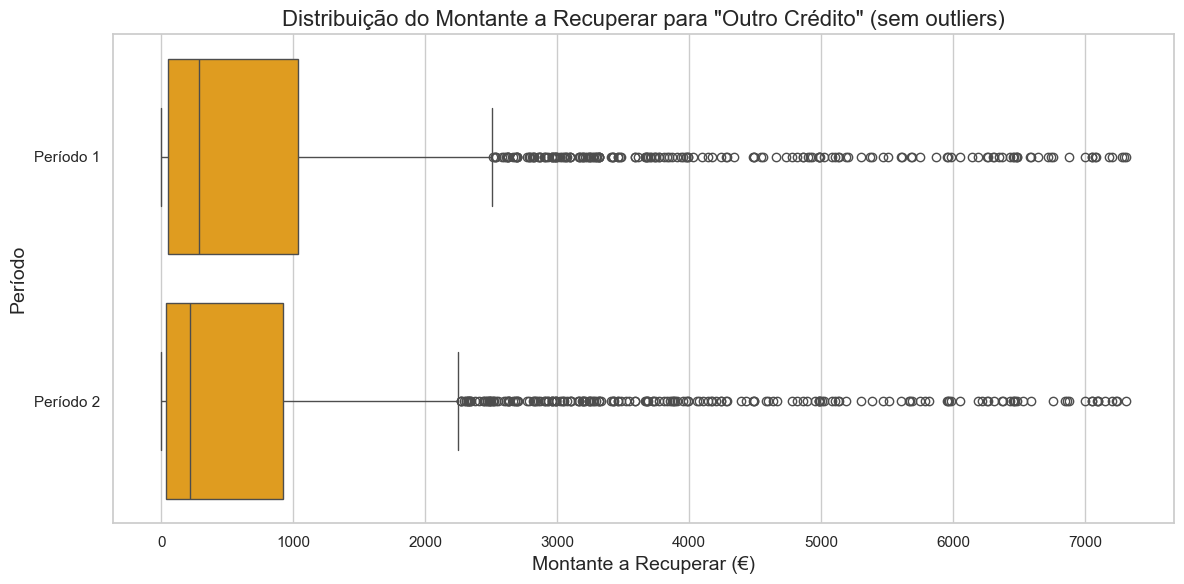

In [101]:
# Filtrar os dados para o tipo de crédito "Outro Crédito"
dados_outro_credito = data_combinada[data_combinada['Tipo de Crédito'] == 'Outro Crédito']

# Calcular os limites para identificar outliers
Q1 = dados_outro_credito['Montante a Recuperar'].quantile(0.25)
Q3 = dados_outro_credito['Montante a Recuperar'].quantile(0.75)
IQR = Q3 - Q1

# Limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os dados para remover outliers
dados_sem_outliers = dados_outro_credito[(dados_outro_credito['Montante a Recuperar'] >= limite_inferior) & 
                                          (dados_outro_credito['Montante a Recuperar'] <= limite_superior)]

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Criar o boxplot horizontal sem outliers
plt.figure(figsize=(12, 6))
sns.boxplot(y='Período', x='Montante a Recuperar', data=dados_sem_outliers, orient='h', color='orange')

# Definir título e rótulos dos eixos
plt.title('Distribuição do Montante a Recuperar para "Outro Crédito" (sem outliers)', fontsize=16)
plt.xlabel('Montante a Recuperar (€)', fontsize=14)
plt.ylabel('Período', fontsize=14)

# Ajustar o layout
plt.tight_layout()
plt.show()

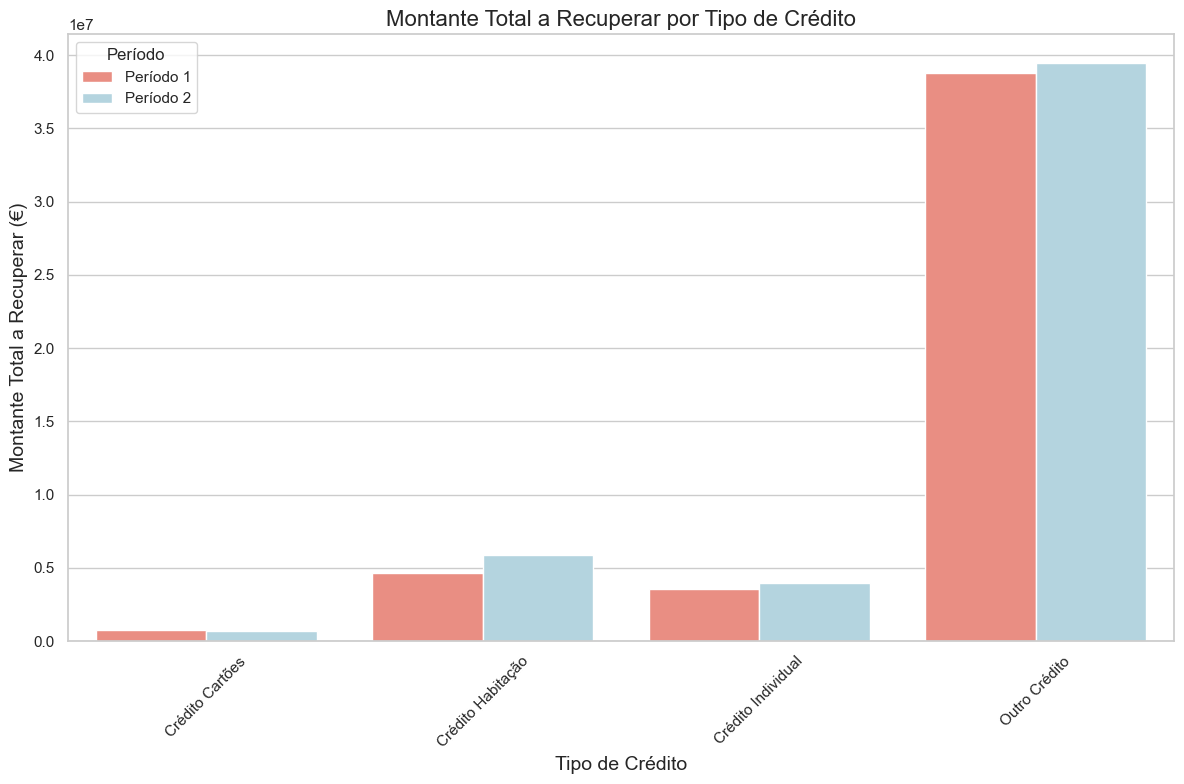

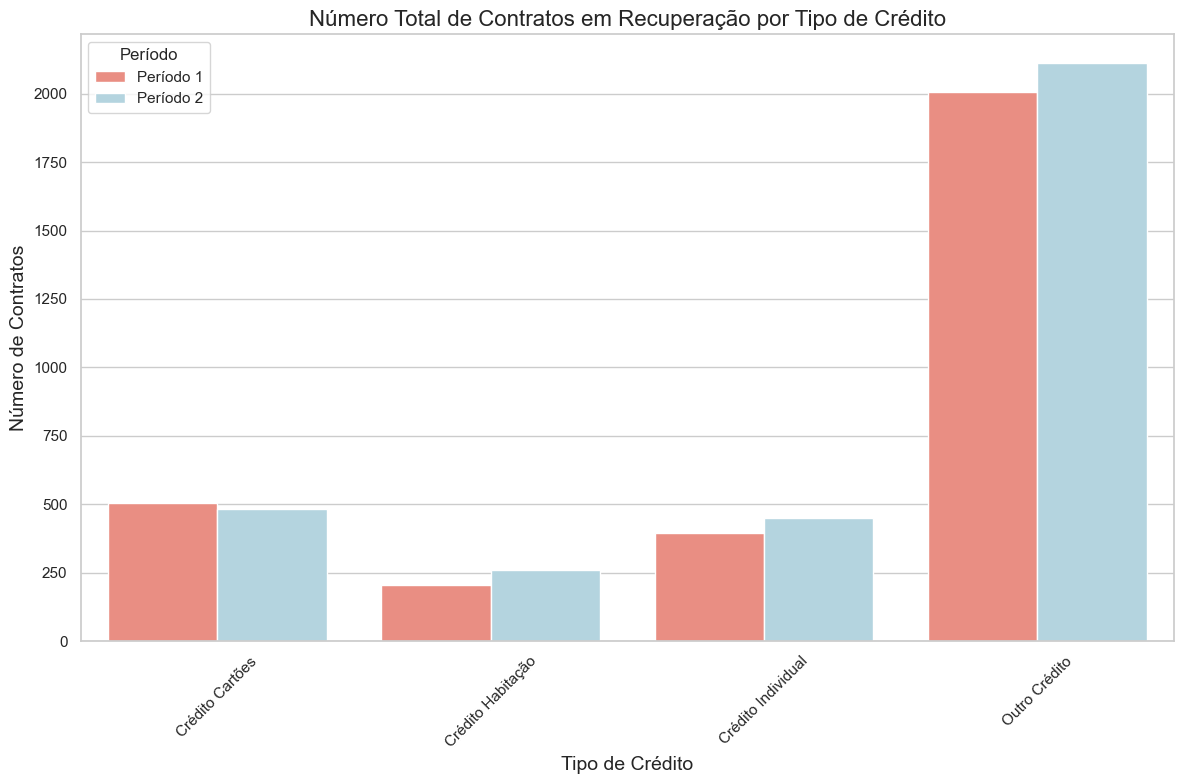

In [75]:

# Definindo a paleta de cores para os períodos
period_palette = {
    'Período 1': 'salmon',  # Cor para Período 1
    'Período 2': 'lightblue'        # Cor para Período 2
}

# Visualização Gráfica da Comparação entre Períodos para Montante Total a Recuperar
plt.figure(figsize=(12, 8))
sns.barplot(
    data=resumo_comparado, 
    x="Tipo de Crédito", 
    y="montante_total", 
    hue="Período",
    palette=period_palette  # Usando a paleta para períodos
)
plt.title("Montante Total a Recuperar por Tipo de Crédito", fontsize=16)
plt.xlabel("Tipo de Crédito", fontsize=14)
plt.ylabel("Montante Total a Recuperar (€)", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Período')
plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()

# Visualização Gráfica da Comparação entre Períodos para Número Total de Contratos
plt.figure(figsize=(12, 8))
sns.barplot(
    data=resumo_comparado, 
    x="Tipo de Crédito", 
    y="total_contratos", 
    hue="Período",
    palette=period_palette  # Usando a paleta para períodos
)
plt.title("Número Total de Contratos em Recuperação por Tipo de Crédito", fontsize=16)
plt.xlabel("Tipo de Crédito", fontsize=14)
plt.ylabel("Número de Contratos", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Período')
plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()

C:\Users\bviei\anaconda3\envs\DM2425\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


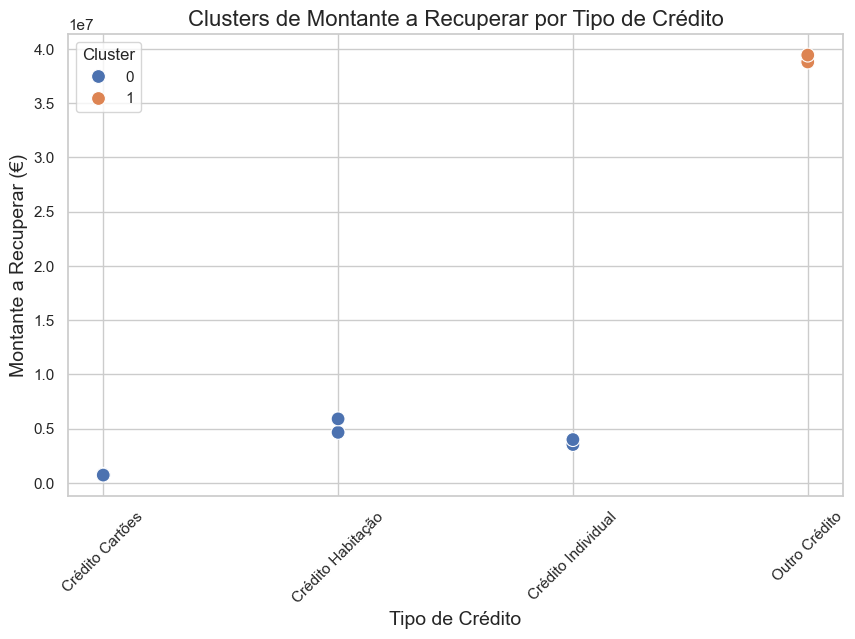

In [83]:
# Concatenar os DataFrames
data_combinada = pd.concat([data_periodo_1, data_periodo_2], ignore_index=True)

# Estatísticas descritivas por período
estatisticas = data_combinada.groupby('Período')['Montante a Recuperar'].describe()

# Resumir os dados por período
resumo = data_combinada.groupby(['Período', 'Tipo de Crédito'])['Montante a Recuperar'].sum().reset_index()

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(resumo[['Montante a Recuperar']])

# Definir o número de clusters
n_clusters = 2  # Ajuste conforme necessário
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
resumo['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=resumo, x='Tipo de Crédito', y='Montante a Recuperar', hue='Cluster', palette='deep', s=100)
plt.title('Clusters de Montante a Recuperar por Tipo de Crédito', fontsize=16)
plt.xlabel('Tipo de Crédito', fontsize=14)
plt.ylabel('Montante a Recuperar (€)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()